In [5]:
import sys
!{sys.executable} -m pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 5.4 MB/s eta 0:00:00 MB/s eta 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 7.8 MB/s eta 0:00:00 MB/s eta 0:00:01
Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl (65 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 8.5 MB/s eta 0:00:0010.1 MB/s eta 0:00:01
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.5/libexec/bin/python -m pip install --upgrade pip


In [6]:
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv('file1.csv', parse_dates=['purchase_date'])

# Choose only tenwords_1w_9.99_offer and non-refunded payments
df = df[(df['product_id'] == 'tenwords_1w_9.99_offer') & (df['refunded'] == False)]

✅ Крок 1: Завантажено та відфільтровано дані
   user_id              product_id  refunded purchase_date     country_code  \
1  2604470  tenwords_1w_9.99_offer     False    2020-09-29               UK   
2  2274467  tenwords_1w_9.99_offer     False    2020-08-18  Organic/Unknown   
4  2571294  tenwords_1w_9.99_offer     False    2020-09-25               US   
5  2217390  tenwords_1w_9.99_offer     False    2020-09-05               MX   
6  2086438  tenwords_1w_9.99_offer     False    2020-07-28               US   

      media_source  
1     Facebook Ads  
2  Organic/Unknown  
4       Google Ads  
5     Facebook Ads  
6     Facebook Ads  


In [8]:
# Sorying ad enumerating payments
df = df.sort_values(by=['user_id', 'purchase_date'])
df['payment_number'] = df.groupby('user_id').cumcount() + 1

✅ Крок 2: Нумерація платежів для кожного користувача
       user_id              product_id  refunded purchase_date  \
6970     27637  tenwords_1w_9.99_offer     False    2020-07-05   
38650    31549  tenwords_1w_9.99_offer     False    2020-08-25   
61235    31549  tenwords_1w_9.99_offer     False    2020-08-25   
47316    31921  tenwords_1w_9.99_offer     False    2020-08-25   
31438    34244  tenwords_1w_9.99_offer     False    2020-09-07   
45838    34491  tenwords_1w_9.99_offer     False    2020-07-15   
46464    34491  tenwords_1w_9.99_offer     False    2020-07-22   
57328    34491  tenwords_1w_9.99_offer     False    2020-08-22   
62809    34491  tenwords_1w_9.99_offer     False    2020-08-22   
25192    35450  tenwords_1w_9.99_offer     False    2020-08-20   

          country_code     media_source  payment_number  
6970                PL     Facebook Ads               1  
38650               CO     Facebook Ads               1  
61235               CO     Facebook Ads       

In [9]:
# Calculating number of payments for every user
payments_per_user = df.groupby('user_id').size()

# Average number of payments per user
avg_payments_per_user = payments_per_user.mean()

✅ Крок 3: Середня кількість оплат на користувача: 2.39


In [10]:
price_per_payment = 9.99
ltv = avg_payments_per_user * price_per_payment

print(f"Predicted LTV for the whole period: ${ltv:.2f}")


✅ Крок 4: Прогнозований LTV за весь період: $23.85


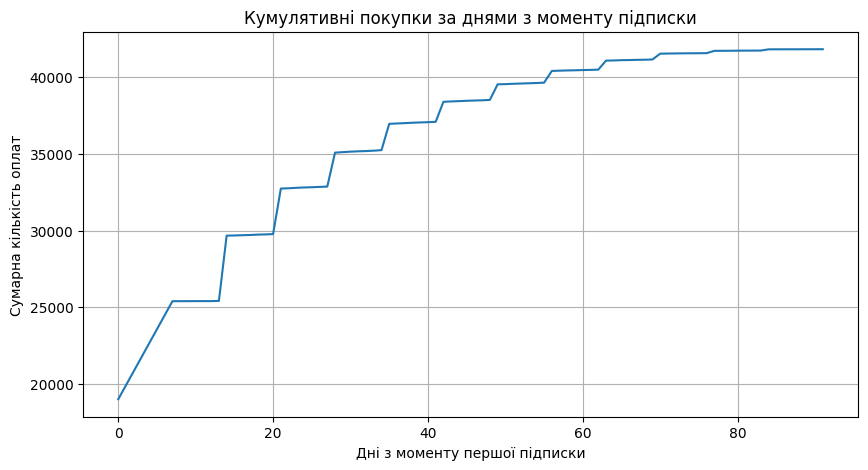

In [12]:
# Duration in days since first payment
df['min_purchase'] = df.groupby('user_id')['purchase_date'].transform('min')
df['days_since_first'] = (df['purchase_date'] - df['min_purchase']).dt.days

#Crete 
payment_lifetime = df.groupby('days_since_first').size().cumsum()

plt.figure(figsize=(10,5))
payment_lifetime.plot()
plt.title("Кумулятивні покупки за днями з моменту підписки")
plt.xlabel("Дні з моменту першої підписки")
plt.ylabel("Сумарна кількість оплат")
plt.grid(True)
plt.show()
